# SCC-ICMC-USP - 2º Semestre de 2023
## SCC0275 - Introdução à Ciência de Dados
### Professora: Roseli A. F. Romero
### Monitor: Roseval Malaquias Jr

### **Exercício 6**

**Número do Grupo:**
22

**Alunos:**
1. Lucas Yuji Matubara

Nesta atividade, nosso objetivo é exercitar os seguintes conceitos:
- Entender modelagem de dados;
- Entender o processo de avaliação;
- Trabalhar com procedimentos de amostragem;
- Trabalhar com várias medidas de avaliação.

---

**Escolha, entre as opções abaixo, apenas UM dataset para realizar os exercícios.**

**Se o dataset escolhido tiver mais de duas classes, transforme ele num problema binário. Isso pode ser feito escolhendo uma classe para representar a classe positiva e o restante a classe negativa.**

**Possíveis datasets:**


*   **Câncer de mama:** [sklearn.datasets.load_breast_cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer)
*   **Dígitos:** [sklearn.datasets.load_digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits)
*   **Wine:** [sklearn.datasets.load_wine](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine)


---

Após a análise dos dados e um pré-processamento, segue a etapa de modelagem dos experimentos. Essa etapa pode exigir um retorno ao pré-processamento, caso seja percebido que algo precisa ser ajustado. A modelagem visa determinar as etapas da execução dos experimentos. No nosso cenário, o experimento é a utilização de algoritmos de classificação, regressão ou agrupamento. Para tanto, é preciso definir, com a ajuda da análise dos dados, o tipo do problema (classificação, regressão, ...), os atributos/features a serem utilizados e o processo de avaliação.

Esta prática foca mais no processo de avaliação. Para a avaliação, é necessário definir qual a função de custo/erro adequada e qual o estimador para o desempenho.

Utilizaremos medidas de desempenho para classificação binária baseadas na matriz de confusão (TFP, TFN, TVP, TVN).

Nas aplicações reais, o cliente dita qual a medida de desempenho deve ser utilizada, e muitas vezes não é uma das clássicas. E como essa medida, em geral, tem um impacto grande no treinamento do algoritmo de classificação, muitas vezes o algoritmo precisa ser adaptado e isso não é uma tarefa fácil.

Após a definição do tipo do problema e da medida de avaliação, é preciso definir como será estimado o desempenho final.

Esse processo está ligado à escolha do algoritmo de classificação, bem como à escolha de alguns hiperparâmetros. Uma abordagem muito comum na área é a utilização do 10-fold Cross-Validation. Esse procedimento pode ser utilizado para estimar o desempenho do classificador final, bem como, na escolha de alguns poucos hiperparâmetros.

---


Base Escolhida: <br>
Dígitos: sklearn.datasets.load_digits

### Questão 01.

- Caso a base escolhida tenha mais de 2 classes, transforme-a em um problema binário. Você pode fazer isso uma vez e depois usar a nova base nas próximas questões.

- Outras operações como remoção de atributos podem ser feitas uma vez fora da função de pré-processamento.

- Implemente a função de pré-processamento para sua base aplicando as técnicas que achar necessário.


In [34]:
from sklearn.datasets import load_digits
import numpy as np

In [35]:
digits = load_digits()
X = digits.data  # Os dados das imagens
y = digits.target  # Os rótulos correspondentes

In [36]:
#transformarei o problema em: o número é 2, o número não é 2
y = np.where(y == 2, 1, 0)
print(y)

[0 0 1 ... 0 0 0]


In [37]:
import pandas as pd

In [38]:
#fazer o preprocessamento
X_df = pd.DataFrame(X, columns=[f"pixel_{i}" for i in range(digits.data.shape[1])])
y_df = pd.DataFrame(y, columns=["target"])

In [39]:
X_df.head(3)

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_54,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0


In [40]:
y_df.head(3)

,target
0,0
1,0
2,1


In [41]:
X_df.isna().sum()

pixel_0     0
pixel_1     0
pixel_2     0
pixel_3     0
pixel_4     0
           ..
pixel_59    0
pixel_60    0
pixel_61    0
pixel_62    0
pixel_63    0
Length: 64, dtype: int64

In [42]:
y_df.isna().sum()

target    0
dtype: int64

Após realizar a soma de elementos vazios percebi que não há valores faltantes.

In [43]:
import matplotlib.pyplot as plt

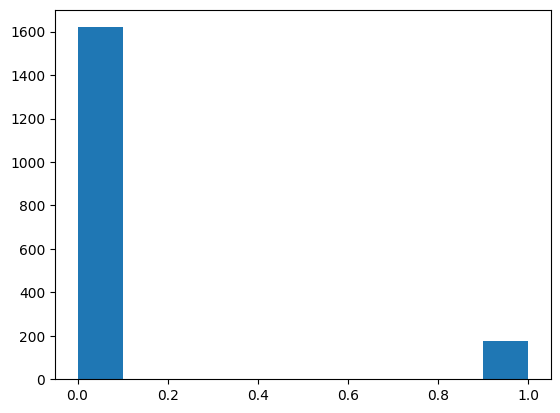

In [44]:
plt.hist(y)
plt.show()

Aqui é bem perceptível o desbalanceamento dos dados, algo que já era esperado quando transformamos o problema em binário. Vamos tratar isso com subamostragem e superamostragem juntas:

In [45]:
from sklearn.utils import resample

In [46]:
df = pd.concat([X_df, y_df], axis=1)

classe_majoritaria = df[df['target'] == 0]
classe_minoritaria = df[df['target'] == 1]

subamostragem = resample(classe_majoritaria,
                      replace=False,
                      n_samples=int(df.shape[0] / 2))

In [47]:
from imblearn.over_sampling import RandomOverSampler

<Axes: >

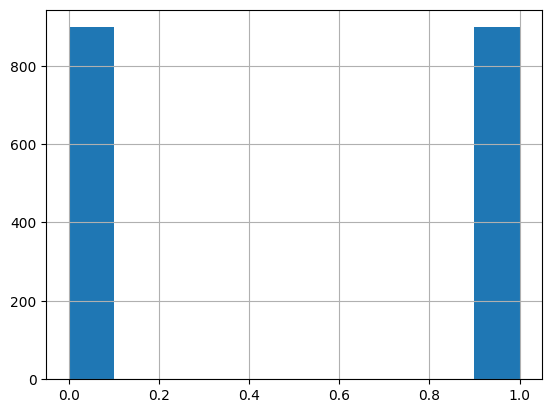

In [48]:
df = pd.concat([classe_minoritaria, subamostragem], axis=0)
X_df = df.copy()
X_df.drop(['target'], axis=1, inplace=True)

y_df = df['target'].copy()

imputer = RandomOverSampler(sampling_strategy='auto')
X_df, y_df = imputer.fit_resample(X_df, y_df)

y_df.hist()

Aqui eu pensei em fazer a matriz de correlação, mas acredito que por se tratarem de pixeis, acho que não faria muito sentido procurar uma relação de proximidade entre eles, além de serem 63, o que seria uma matriz 63², e traria muito trabalho, acredito que fugiria da proposta do exercício.

---
### Questão 02.

Implemente a função que retorna a matriz de confusão, escolha duas métricas de avaliação e crie 2 funções, sendo  uma função para cada métrica calculada a partir da matriz confusão.

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

In [51]:
def confusion_matrix(y_test, y_pred):
  conf = np.zeros((2, 2))

  for true_label, predicted_label in zip(y_test, y_pred):
    conf[true_label, predicted_label] += 1

  return conf

In [52]:
# Demonstra o funcionamento da função confusion_matrix.
actual    = np.array([1, 0, 1, 1, 0, 0, 1, 0, 1, 1])
predicted = np.array([0, 1, 1, 1, 1, 0, 1, 1, 0, 1])

conf_mat = confusion_matrix(actual, predicted)
print(conf_mat)

[[1. 3.]
 [2. 4.]]


In [53]:
#TFP ou Custo
def tfp(conf_mat):
  return conf_mat[1][0] / (conf_mat[1][0] + conf_mat[1][1])

m = tfp(conf_mat)
print(m)

0.3333333333333333


In [54]:
#TVP ou Beneficio
def tvp(conf_mat):
  return conf_mat[0][0] / (conf_mat[0][0] + conf_mat[0][1])

m = tvp(conf_mat)
print(m)

0.25


---
### Questão 03.

Complete e execute a função *classificacao* definida no notebook.

- Aplique validação cruzada
- Use sua função de pré-processamento
- Use suas métricas de avaliação

**ATENÇÃO:** utilizar o método ``sklearn.model_selection.KFold`` para realizar a amostragem solicitada. Pretem atenção nas dicas e complete o código onde foi solicitado.

---

### Questão 04.

Utilizar os 2 procedimentos de amostragem para estimação do desempenho:
- 10-fold Cross Validation;
- Leave-one-out;

Para o dataset escolhido, executar os 2 procedimentos acima para estimar o desempenho.

> **DICA:** Você pode utilizar a função *classificacao* já disponível apenas ajustando o parâmetro *folds*.

In [55]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [56]:
from sklearn.ensemble import RandomForestClassifier
modelo = RandomForestClassifier()

In [57]:
pontuacoes = cross_val_score(modelo, X, y, cv=kf)

In [58]:
print("Score:", pontuacoes)
print(f"Média: {pontuacoes.mean():.2f}")
print(f"Desvio padrão: {pontuacoes.std():.2f}")

Pontuações para cada fold: [1.         1.         1.         0.98888889 0.98333333 0.98888889
 1.         0.99441341 0.99441341 0.97765363]
Média: 0.99
Desvio padrão: 0.01


In [59]:
from sklearn.model_selection import LeaveOneOut

In [60]:
loo = LeaveOneOut()
pontuacoes = cross_val_score(modelo, X, y, cv=loo)

In [61]:
print("Score:", pontuacoes)
print(f"Média: {pontuacoes.mean():.2f}")
print(f"Desvio padrão: {pontuacoes.std():.2f}")

Pontuações para cada fold: [1. 1. 1. ... 1. 1. 1.]
Média: 0.99
Desvio padrão: 0.07
